In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [2]:
print("Customers data info:")
print(customers.info())


Customers data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [3]:
print("\nProducts data info:")
print(products.info())



Products data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [4]:
print("\nTransactions data info:")
print(transactions.info())


Transactions data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [6]:
# Checking for missing values
print("\nMissing values:")
print("Customers:\n", customers.isnull().sum())
print("Products:\n", products.isnull().sum())
print("Transactions:\n", transactions.isnull().sum())



Missing values:
Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
# Merging datasets
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")


In [8]:
# Derive insights

# 1. Top 5 regions contributing to total revenue
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nTop 5 regions by total revenue:")
print(region_revenue.head(5))


Top 5 regions by total revenue:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [9]:
# 2. Top 5 products generating the most revenue
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
print("\nTop 5 products by total revenue:")
print(top_products.head(5))


Top 5 products by total revenue:
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


In [10]:
# 3. Analyze revenue contribution by product category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue contribution by category:")
print(category_revenue)


Revenue contribution by category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


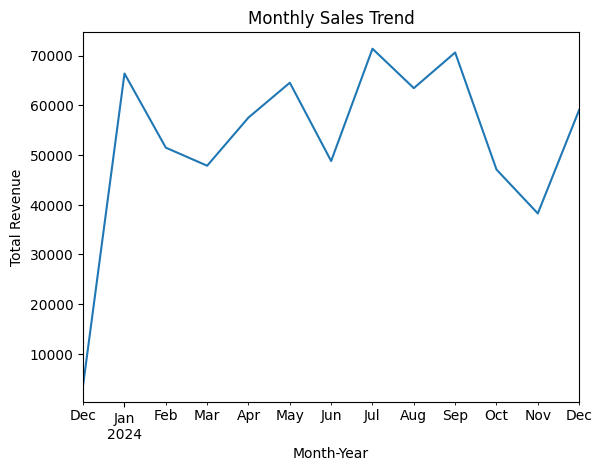

In [11]:
# 4. Monthly sales trend
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['MonthYear'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_sales = merged_data.groupby('MonthYear')['TotalValue'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend', xlabel='Month-Year', ylabel='Total Revenue')
plt.show()

In [12]:
# 5. Most active customers based on transaction count and revenue
customer_activity = merged_data.groupby('CustomerName').agg({'TransactionID': 'count', 'TotalValue': 'sum'}).sort_values(by='TotalValue', ascending=False)
print("\nTop 5 customers by activity and revenue:")
print(customer_activity.head(5))


Top 5 customers by activity and revenue:
               TransactionID  TotalValue
CustomerName                            
Paul Parsons              10    10673.87
Bruce Rhodes               8     8040.39
Gerald Hines              10     7663.70
William Adams             11     7634.45
Aimee Taylor               7     7572.91


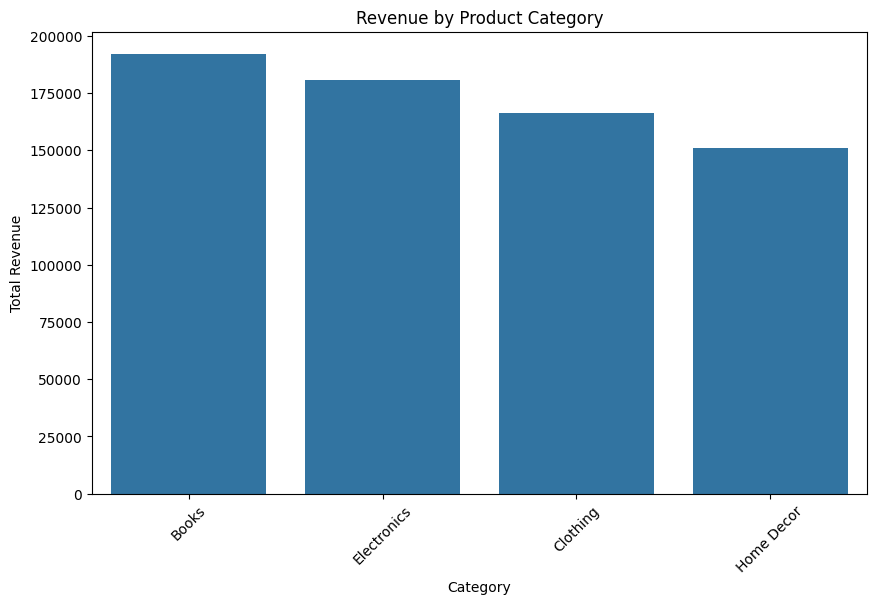

In [14]:
#Visualization examples
plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.index, y=category_revenue.values)
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()